# Lesson Three -  Regression Analysis
## Student Exercises

## Exercise 1 - Plotting Data with Moving Average

For this exercise we have acquired a dataset of weather information form Austin Texas and will be looking at the changes in average daily temperature.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Suppress pandas warnings for now
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

Load the dataset into a pandas DataFrame from the csv file

In [2]:
df = pd.read_csv('austin_weather.csv')
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


We only need the Date and TempAvgF columns, remove all others from the dataset

In [3]:
df = df[['Date', 'TempAvgF']]
df.head()

,Date,TempAvgF
0,2013-12-21,60
1,2013-12-22,48
2,2013-12-23,45
3,2013-12-24,46
4,2013-12-25,50


Initially we are only interested in the first years data, thus we need to extract this information.  Create a column in the DataFrame for the Year value and extract the year value as an integer from the strings in the Date column and assign these values to the Year column.

**Note: Temperatures are recorded daily**

In [4]:
df['Year'] = [int(dt[:4]) for dt in df.Date]
df.head()

,Date,TempAvgF,Year
0,2013-12-21,60,2013
1,2013-12-22,48,2013
2,2013-12-23,45,2013
3,2013-12-24,46,2013
4,2013-12-25,50,2013


Repeat this process to extract the month values and store the values as integers in a column Month

In [5]:
df['Month'] = [int(dt[5:7]) for dt in df.Date]
df.head()

,Date,TempAvgF,Year,Month
0,2013-12-21,60,2013,12
1,2013-12-22,48,2013,12
2,2013-12-23,45,2013,12
3,2013-12-24,46,2013,12
4,2013-12-25,50,2013,12


Copy the first year's worth of data to a DataFrame

In [6]:
df_first_year = df[:365]
df_first_year.head()

,Date,TempAvgF,Year,Month
0,2013-12-21,60,2013,12
1,2013-12-22,48,2013,12
2,2013-12-23,45,2013,12
3,2013-12-24,46,2013,12
4,2013-12-25,50,2013,12


Compute a 10 day moving average filter

In [7]:
window = 20
rolling = df_first_year.TempAvgF.rolling(window).mean();
rolling.head(n=20)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19    47.75
Name: TempAvgF, dtype: float64

Plot the raw data and moving average signal, with the x axis the day number in the year

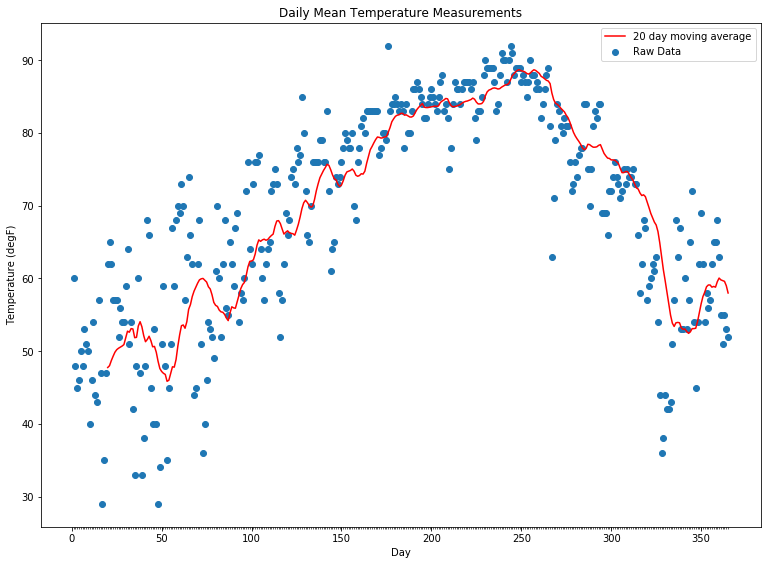

In [8]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);

# Temp measurements
ax.scatter(range(1, 366), df_first_year.TempAvgF, label='Raw Data');
ax.plot(range(1, 366), rolling, c='r', label=f'{window} day moving average');

ax.set_title('Daily Mean Temperature Measurements')
ax.set_xlabel('Day')
ax.set_ylabel('Temperature (degF)')
ax.set_xticks(range(1, 366), 10)
ax.legend();

## Exercise 2 - Least Squares Method Linear Regression
Construct a least squares linear model for the dataset

In [9]:
from sklearn.linear_model import LinearRegression

Create a linear regression model using the default parameters i.e. calculate a y-intercept for the model and do not normalise the data

In [10]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now fit the model the input data is the day number for the year (1 to 365) and the output is the average temperature.  To make later calculations easier insert a column (DayOfYear) which corresponds with the day of the year for that measurement.

In [11]:
df_first_year.loc[:,'DayOfYear'] = [i + 1 for i in df_first_year.index]
df_first_year.head()

,Date,TempAvgF,Year,Month,DayOfYear
0,2013-12-21,60,2013,12,1
1,2013-12-22,48,2013,12,2
2,2013-12-23,45,2013,12,3
3,2013-12-24,46,2013,12,4
4,2013-12-25,50,2013,12,5


In [12]:
# Note the year values need to be provided as an N x 1 array
model.fit(df_first_year.DayOfYear.values.reshape((-1, 1)), df_first_year.TempAvgF)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Print the parameters of the model

In [13]:
print(f'm = {model.coef_[0]}')
print(f'c = {model.intercept_}')

print('\nModel Definition')
print(f'y = {model.coef_[0]:0.4}x + {model.intercept_:0.4f}')

m = 0.04909173467448788
c = 60.28196597922625

Model Definition
y = 0.04909x + 60.2820


What does the trendline provided by the model look like?  We can plot this simply using the first, middle and last years in the linear equation.

In [14]:
trend_x = np.array([
    1,
    182.5,
    365
])

trend_y = model.predict(trend_x.reshape((-1, 1)))
trend_y

array([60.33105771, 69.24120756, 78.20044914])

Plot the values with the trendling

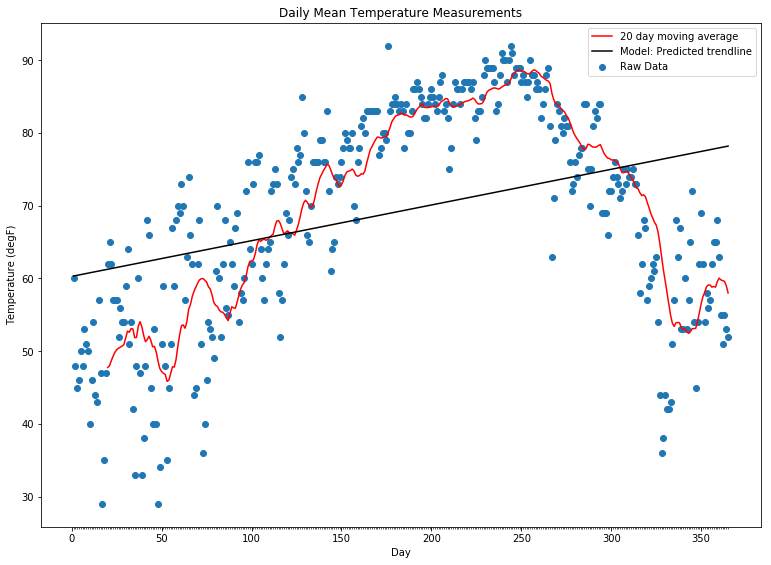

In [15]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);

# Temp measurements
ax.scatter(df_first_year.DayOfYear, df_first_year.TempAvgF, label='Raw Data');
ax.plot(df_first_year.DayOfYear, rolling, c='r', label=f'{window} day moving average');
ax.plot(trend_x, trend_y, c='k', label='Model: Predicted trendline')

ax.set_title('Daily Mean Temperature Measurements')
ax.set_xlabel('Day')
ax.set_ylabel('Temperature (degF)')
ax.set_xticks(range(1, 366), 10)
ax.legend();

Evaluate the performance of the model

How well does the model fit the data?  Calculate the $r^2$ score to find out.

In [16]:
# Note the year values need to be provided as an N x 1 array
r2 = model.score(df_first_year.DayOfYear.values.reshape((-1, 1)), df_first_year.TempAvgF)
print(f'r2 score = {r2:0.4f}')

r2 score = 0.1222


## Exercise 3 - Dummy Variables

There seems to be an inflection point around day 250, create a dummy variable to introduce this feature into the linear model.

In [17]:
df_first_year.loc[:,'inflection'] = [1 * int(i < 250) for i in df_first_year.DayOfYear]

Check the first and last samples to confirm the dummy variable is correct

In [18]:
df_first_year.head()

,Date,TempAvgF,Year,Month,DayOfYear,inflection
0,2013-12-21,60,2013,12,1,1
1,2013-12-22,48,2013,12,2,1
2,2013-12-23,45,2013,12,3,1
3,2013-12-24,46,2013,12,4,1
4,2013-12-25,50,2013,12,5,1


In [19]:
df_first_year.tail()

,Date,TempAvgF,Year,Month,DayOfYear,inflection
360,2014-12-16,55,2014,12,361,0
361,2014-12-17,51,2014,12,362,0
362,2014-12-18,55,2014,12,363,0
363,2014-12-19,53,2014,12,364,0
364,2014-12-20,52,2014,12,365,0


Fit the model to the DayOfYear values and the dummy variable to predict TempAvgF

In [20]:
# Note the year values need to be provided as an N x 1 array
model.fit(df_first_year[['DayOfYear', 'inflection']], df_first_year.TempAvgF)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Compute the $r^2$ score

In [21]:
# Note the year values need to be provided as an N x 1 array
r2 = model.score(df_first_year[['DayOfYear', 'inflection']], df_first_year.TempAvgF)
print(f'r2 score = {r2:0.4f}')

r2 score = 0.3631


Using the DayOfYear values create a set of predictions using the model to construct a trendline

In [22]:
trend_y = model.predict(df_first_year[['DayOfYear', 'inflection']].values)
trend_y

array([51.60311133, 51.74622654, 51.88934175, 52.03245696, 52.17557217,
       52.31868739, 52.4618026 , 52.60491781, 52.74803302, 52.89114823,
       53.03426345, 53.17737866, 53.32049387, 53.46360908, 53.60672429,
       53.7498395 , 53.89295472, 54.03606993, 54.17918514, 54.32230035,
       54.46541556, 54.60853078, 54.75164599, 54.8947612 , 55.03787641,
       55.18099162, 55.32410683, 55.46722205, 55.61033726, 55.75345247,
       55.89656768, 56.03968289, 56.1827981 , 56.32591332, 56.46902853,
       56.61214374, 56.75525895, 56.89837416, 57.04148938, 57.18460459,
       57.3277198 , 57.47083501, 57.61395022, 57.75706543, 57.90018065,
       58.04329586, 58.18641107, 58.32952628, 58.47264149, 58.61575671,
       58.75887192, 58.90198713, 59.04510234, 59.18821755, 59.33133276,
       59.47444798, 59.61756319, 59.7606784 , 59.90379361, 60.04690882,
       60.19002404, 60.33313925, 60.47625446, 60.61936967, 60.76248488,
       60.90560009, 61.04871531, 61.19183052, 61.33494573, 61.47

Plot the trendline against the data and moving average

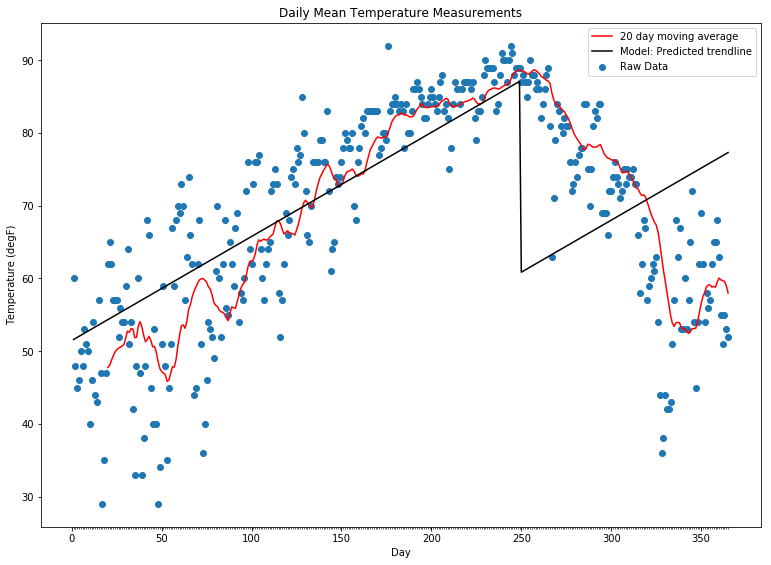

In [23]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);

# Temp measurements
ax.scatter(df_first_year.DayOfYear, df_first_year.TempAvgF, label='Raw Data');
ax.plot(df_first_year.DayOfYear, rolling, c='r', label=f'{window} day moving average');
ax.plot(df_first_year.DayOfYear, trend_y, c='k', label='Model: Predicted trendline')

ax.set_title('Daily Mean Temperature Measurements')
ax.set_xlabel('Day')
ax.set_ylabel('Temperature (degF)')
ax.set_xticks(range(1, 366), 10)
ax.legend();

## Exercise 4 - Other Model Types with Linear Regression
We have tried a standard linear model as well as a dummy variable.  Experiment with a few other functions such as the parabolic to try and get a better fit for the data.  For each function you try make sure you print the function parameters, $r^2$ value and plot the trendline against the original and moving average data.



In [24]:
# Using a sine curve
df_first_year['DayOfYear2'] = np.sin(df_first_year['DayOfYear'] / df_first_year['DayOfYear'].max())
df_first_year.head()

,Date,TempAvgF,Year,Month,DayOfYear,inflection,DayOfYear2
0,2013-12-21,60,2013,12,1,1,0.002740
1,2013-12-22,48,2013,12,2,1,0.005479
2,2013-12-23,45,2013,12,3,1,0.008219
3,2013-12-24,46,2013,12,4,1,0.010959
4,2013-12-25,50,2013,12,5,1,0.013698


In [25]:
# Note the year values need to be provided as an N x 1 array
model.fit(df_first_year[['DayOfYear2', 'DayOfYear']], df_first_year.TempAvgF)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Print the parameters of the model

In [26]:
print(f'a = {model.coef_[0]}')
print(f'm = {model.coef_[1]}')
print(f'c = {model.intercept_}')

print('\nModel Definition')
print(f'y = {model.coef_[0]:0.4}x^2 + {model.coef_[1]:0.4}x + {model.intercept_:0.4f}')

a = 634.322313570282
m = -1.4371290614190075
c = 39.93286585807408

Model Definition
y = 634.3x^2 + -1.437x + 39.9329


In [27]:
# Note the year values need to be provided as an N x 1 array
r2 = model.score(df_first_year[['DayOfYear2', 'DayOfYear']], df_first_year.TempAvgF)
print(f'r2 score = {r2:0.4f}')

r2 score = 0.7047


In [28]:
trend_y = model.predict(df_first_year[['DayOfYear2', 'DayOfYear']].values)
trend_y

array([40.23360397, 40.53432905, 40.83502803, 41.13568788, 41.43629555,
       41.736838  , 42.03730219, 42.33767507, 42.6379436 , 42.93809474,
       43.23811546, 43.5379927 , 43.83771344, 44.13726463, 44.43663324,
       44.73580624, 45.03477059, 45.33351327, 45.63202123, 45.93028146,
       46.22828093, 46.52600661, 46.82344549, 47.12058453, 47.41741073,
       47.71391108, 48.01007254, 48.30588213, 48.60132682, 48.89639362,
       49.19106952, 49.48534153, 49.77919664, 50.07262186, 50.36560421,
       50.6581307 , 50.95018834, 51.24176416, 51.53284517, 51.82341842,
       52.11347092, 52.40298972, 52.69196186, 52.98037437, 53.26821431,
       53.55546872, 53.84212468, 54.12816922, 54.41358943, 54.69837238,
       54.98250513, 55.26597476, 55.54876837, 55.83087305, 56.11227588,
       56.39296396, 56.67292442, 56.95214435, 57.23061087, 57.5083111 ,
       57.78523218, 58.06136124, 58.33668542, 58.61119186, 58.88486771,
       59.15770014, 59.42967631, 59.70078339, 59.97100856, 60.24

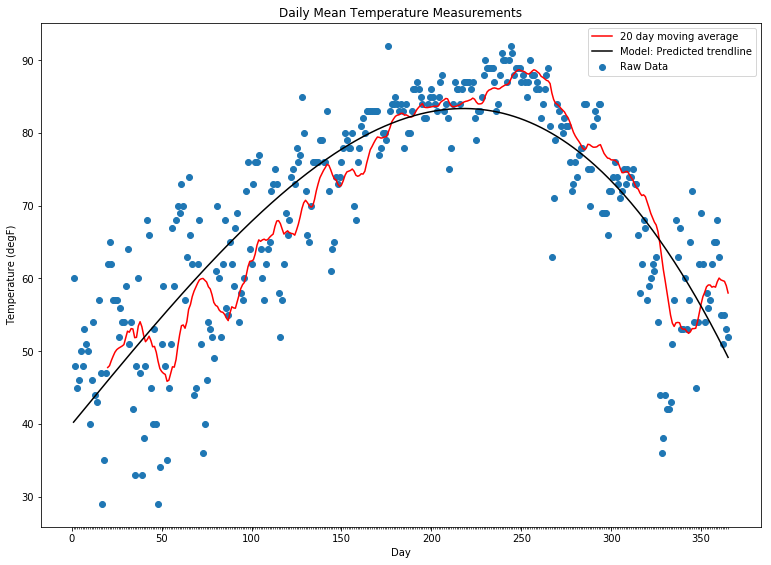

In [29]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);

# Temp measurements
ax.scatter(df_first_year.DayOfYear, df_first_year.TempAvgF, label='Raw Data');
ax.plot(df_first_year.DayOfYear, rolling, c='r', label=f'{window} day moving average');
ax.plot(df_first_year.DayOfYear, trend_y, c='k', label='Model: Predicted trendline')

ax.set_title('Daily Mean Temperature Measurements')
ax.set_xlabel('Day')
ax.set_ylabel('Temperature (degF)')
ax.set_xticks(range(1, 366), 10)
ax.legend();

# Autoregressors

We will now look at the full dataset and use an autoregressor to model the data.  Print out the first 5 rows of data from the original dataset

In [30]:
df.head()

,Date,TempAvgF,Year,Month
0,2013-12-21,60,2013,12
1,2013-12-22,48,2013,12
2,2013-12-23,45,2013,12
3,2013-12-24,46,2013,12
4,2013-12-25,50,2013,12


Plot the full dataset with labelled axes

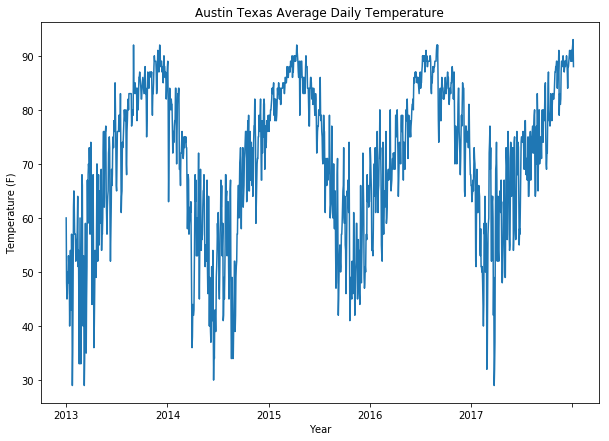

In [31]:
plt.figure(figsize=(10, 7))
plt.plot(df.TempAvgF.values);
yrs = [yr for yr in df.Year.unique()]
plt.xticks(np.arange(0, len(df), len(df) // len(yrs)), yrs);
plt.title('Austin Texas Average Daily Temperature');
plt.xlabel('Year');
plt.ylabel('Temperature (F)');

Create a 20 day lag and plot the lagged data over the original dataset

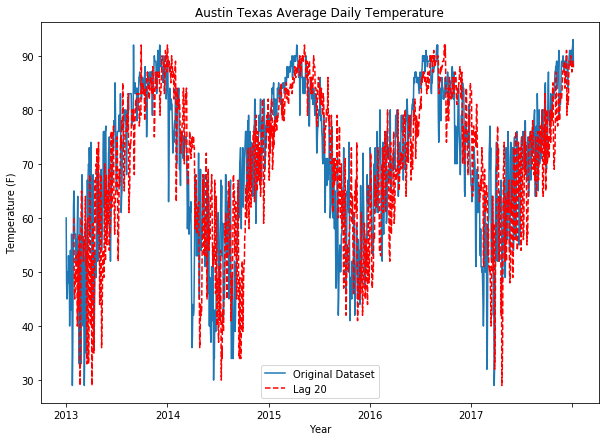

In [32]:
plt.figure(figsize=(10, 7))
plt.plot(df.TempAvgF.values, label='Original Dataset');
plt.plot(df.TempAvgF.shift(20), c='r', linestyle='--',
    label='Lag 20');
yrs = [yr for yr in df.Year.unique()]
plt.xticks(np.arange(0, len(df), len(df) // len(yrs)), yrs);
plt.title('Austin Texas Average Daily Temperature');
plt.xlabel('Year');
plt.ylabel('Temperature (F)');
plt.legend();

Construct an autocorrelation plot to see if the average temperature can be used with an autogressor.  Where is the lag acceptable and where is it not for an autoregressor?

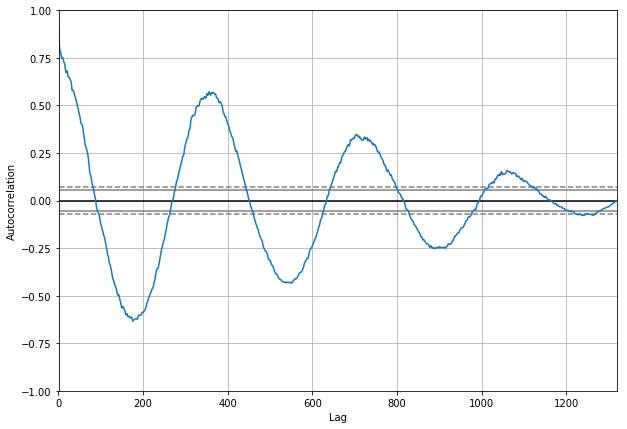

In [33]:
plt.figure(figsize=(10, 7))
pd.plotting.autocorrelation_plot(df.TempAvgF);

**The lag is acceptable only when the autocorrelation line lies outside the 99% confidence bounds as represented by the dashed lines.**

Chose an acceptable lag and unacceptable lag and construct lag plots using these values.

**Acceptable Lag**

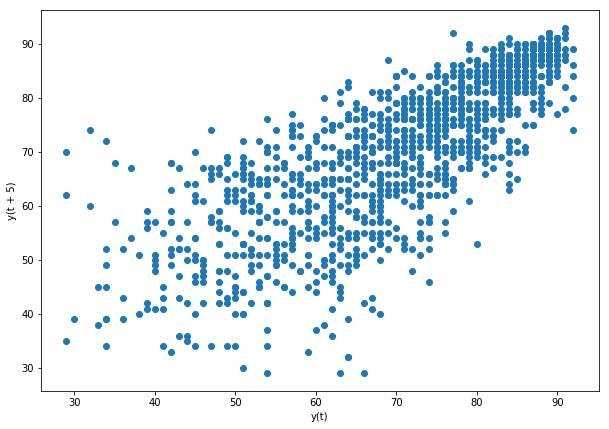

In [34]:
plt.figure(figsize=(10,7))
ax = pd.plotting.lag_plot(df.TempAvgF, lag=5);

**Unacceptable Lag**

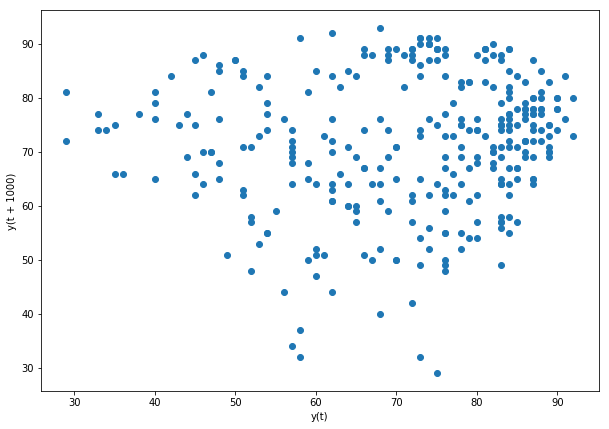

In [35]:
plt.figure(figsize=(10,7))
ax = pd.plotting.lag_plot(df.TempAvgF, lag=1000);

Create an autoregressor model, note the selected lag, calculate the $r^2$ value and plot the autoregressor model with the original plot.  The model is to project past the available data by 1000 samples

In [36]:
from statsmodels.tsa.ar_model import AR
model = AR(df.TempAvgF)

In [37]:
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 23
Coefficients: const           1.909395
L1.TempAvgF     0.912076
L2.TempAvgF    -0.334043
L3.TempAvgF     0.157353
L4.TempAvgF     0.025721
L5.TempAvgF     0.041342
L6.TempAvgF     0.030831
L7.TempAvgF    -0.021230
L8.TempAvgF     0.020324
L9.TempAvgF     0.025147
L10.TempAvgF    0.059739
L11.TempAvgF   -0.017337
L12.TempAvgF    0.043553
L13.TempAvgF   -0.027795
L14.TempAvgF    0.053547
L15.TempAvgF    0.013070
L16.TempAvgF   -0.033157
L17.TempAvgF   -0.000072
L18.TempAvgF   -0.026307
L19.TempAvgF    0.025258
L20.TempAvgF    0.038341
L21.TempAvgF    0.007885
L22.TempAvgF   -0.008889
L23.TempAvgF   -0.011080
dtype: float64


In [38]:
predictions = model_fit.predict(start=model_fit.k_ar, end=len(df) + 1000)
predictions[:10].values

array([54.81171857, 56.89097085, 56.41891585, 50.98627626, 56.11843512,
       53.20665111, 55.13941554, 58.4679288 , 61.92497136, 49.46049801])

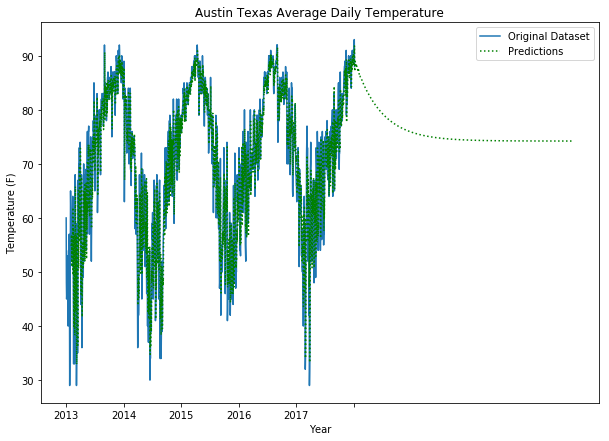

In [39]:
plt.figure(figsize=(10, 7))
plt.plot(df.TempAvgF.values, label='Original Dataset');
plt.plot(predictions, c='g', linestyle=':', label='Predictions');
yrs = [yr for yr in df.Year.unique()]
plt.xticks(np.arange(0, len(df), len(df) // len(yrs)), yrs);
plt.title('Austin Texas Average Daily Temperature');
plt.xlabel('Year');
plt.ylabel('Temperature (F)');
plt.legend();

Enhance the view to look for differences

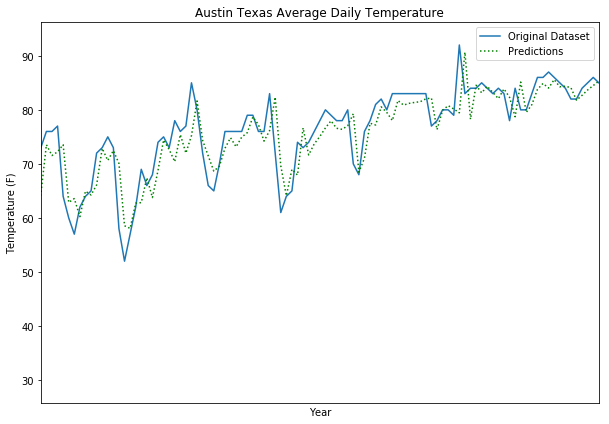

In [40]:
plt.figure(figsize=(10, 7))
plt.plot(df.TempAvgF.values, label='Original Dataset');
plt.plot(predictions, c='g', linestyle=':', label='Predictions');
yrs = [yr for yr in df.Year.unique()]
plt.xticks(np.arange(0, len(df), len(df) // len(yrs)), yrs);
plt.title('Austin Texas Average Daily Temperature');
plt.xlabel('Year');
plt.ylabel('Temperature (F)');
plt.xlim([100, 200])
plt.legend();